# K-Nearest Neighbors (KNN)

KNN is used for classification.
Can be used for regression as well by using the average of the K nearest points.

**The Core Idea:** "Tell me who your neighbors are, and I'll tell you who you are."

To classify a new data point, the algorithm:
1.  Calculates the **distance** between the new point and all other training points.
2.  Selects the **K** nearest points.
3.  Assigns the most common class among those K neighbors (Majority Vote).

## Distance Formulas
How do we measure "closeness"? The choice of distance metric can drastically change the result.

### A. Euclidean Distance (The Ruler)
The straight-line distance between two points. Most common choice.
$$ d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $$

### B. Manhattan Distance (The Taxi Cab)
The distance if you had to walk along a city grid boundaries (no diagonals).
$$ d(p, q) = \sum_{i=1}^{n} |q_i - p_i| $$

### C. Minkowski Distance (The Generalization)
A generalized form where `p` is a parameter.
- If $p=1$: Manhattan Distance
- If $p=2$: Euclidean Distance
$$ d(p, q) = (\sum_{i=1}^{n} |q_i - p_i|^p)^{1/p} $$

## Load Dataset (Breast Cancer Wisconsin)
We will classify tumors as **Malignant (0)** or **Benign (1)** based on cell features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# Create DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## The Importance of Scaling
**CRITICAL:** Because KNN relies on distance, features with large values (like 'Area' ~ 1000) will dominate features with small values (like 'Smoothness' ~ 0.1). We **MUST** scale the data so all features contribute equally.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# Split FIRST, then Scale (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Finding the Best 'K' (The Elbow Method)
How many neighbors should we vote with? 
- Too few (K=1): Sensitive to noise (Overfitting).
- Too many (K=100): Blurs class boundaries (Underfitting).

Let's test K values from 1 to 40 and plot the error rate.

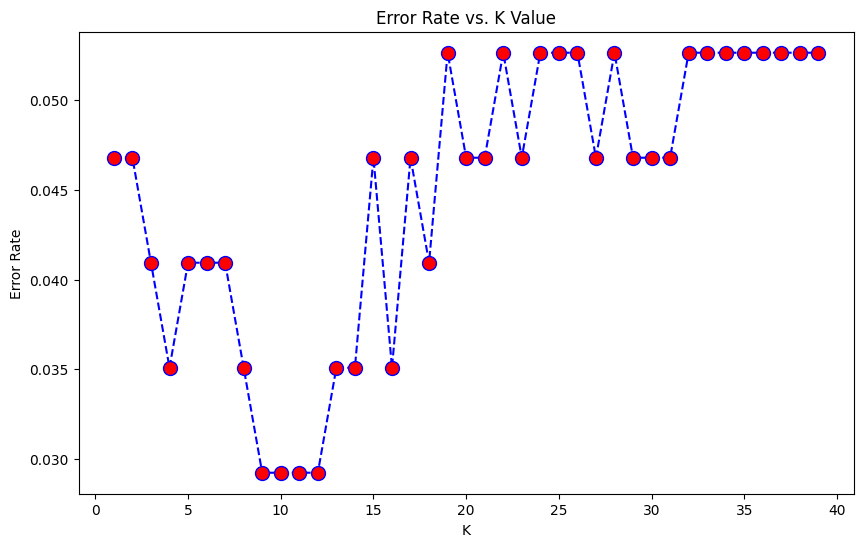

In [3]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
    # We can perform the search using Cross-Validation, but for simplicity we use the test set here
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Error rate is the average of where predictions did not match actuals
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

## Train & Evaluate with Best K
Based on the plot above, we choose a K value where the error is low and stable.

In [ ]:
# choose based on the plot you see
best_k = 10

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))

Confusion Matrix:

[[ 60   3]
 [  2 106]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

